<a href="https://colab.research.google.com/github/bhatmohit/FIFA_ScoutPro/blob/master/FIFA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1)  Description

   Perform EDA to identify patterns and answer the following questions:
1) How do player attributes vary for attacking vs mid vs defensive positions?
2) Are there any patterns in the performance of players based on their ages?

Data Source: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download


## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('Career Mode player datasets - FIFA 15-22.xlsx')

### 2-2. Import libraries for EDA


In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


### 2-3. Review Data


In [ ]:
df.shape

(16155, 110)

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(17), int64(43), object(48)
memory usage: 13.6+ MB


sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [ ]:
df['overall'].describe()

count    16155.000000
mean        63.830393
std          7.169896
min         40.000000
25%         59.000000
50%         64.000000
75%         68.000000
max         93.000000
Name: overall, dtype: float64

### 2-4. Generate Sub-dataset

In [ ]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables
df = df.filter(items=['short_name', 'age', 'league_level', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'player_positions'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        16155 non-null  object 
 1   age               16155 non-null  int64  
 2   league_level      15916 non-null  float64
 3   pace              14380 non-null  float64
 4   shooting          14380 non-null  float64
 5   passing           14380 non-null  float64
 6   dribbling         14380 non-null  float64
 7   defending         14380 non-null  float64
 8   physic            14380 non-null  float64
 9   overall           16155 non-null  int64  
 10  player_positions  16155 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.4+ MB


,short_name,age,league_level,pace,shooting,passing,dribbling,defending,physic,overall,player_positions
0,L. Messi,27,1.0,93.0,89.0,86.0,96.0,27.0,63.0,93,CF
1,Cristiano Ronaldo,29,1.0,93.0,93.0,81.0,91.0,32.0,79.0,92,"LW, LM"
2,A. Robben,30,1.0,93.0,86.0,83.0,92.0,32.0,64.0,90,"RM, LM, RW"
3,Z. Ibrahimović,32,1.0,76.0,91.0,81.0,86.0,34.0,86.0,90,ST
4,M. Neuer,28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90,GK


In [ ]:
# 2. try to change variable names
df.rename(columns={'physic': 'physique'}, inplace=True)
df.head()

,short_name,age,league_level,pace,shooting,passing,dribbling,defending,physique,overall,player_positions
0,L. Messi,27,1.0,93.0,89.0,86.0,96.0,27.0,63.0,93,CF
1,Cristiano Ronaldo,29,1.0,93.0,93.0,81.0,91.0,32.0,79.0,92,"LW, LM"
2,A. Robben,30,1.0,93.0,86.0,83.0,92.0,32.0,64.0,90,"RM, LM, RW"
3,Z. Ibrahimović,32,1.0,76.0,91.0,81.0,86.0,34.0,86.0,90,ST
4,M. Neuer,28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90,GK


In [ ]:
# 3. check if there are missing values
df.isnull().sum()
#dropping records with missing values as they are far less than the total number of records, thus won't impact our analysis
df.dropna(inplace=True)
df.shape

(14178, 11)

In [ ]:
# 4. Check if there are duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
5        False
         ...  
16150    False
16151    False
16152    False
16153    False
16154    False
Length: 14178, dtype: bool

### 2-5. Checking Outliers

In [ ]:
# check if quantitative variables have outliers.
#using z-score method to detect outliers
df['age_zscore'] = (df['age'] - df['age'].mean())/df['age'].std()
df['pace_zscore'] = (df['pace'] - df['pace'].mean())/df['pace'].std()
df['shooting_zscore'] = (df['shooting'] - df['shooting'].mean())/df['shooting'].std()
df['passing_zscore'] = (df['passing'] - df['passing'].mean())/df['passing'].std()
df['dribbling_zscore'] = (df['dribbling'] - df['dribbling'].mean())/df['dribbling'].std()
df['defending_zscore'] = (df['defending'] - df['defending'].mean())/df['defending'].std()
df['physique_zscore'] = (df['physique'] - df['physique'].mean())/df['physique'].std()

threshold = 3
df['age_outlier'] = abs(df['age_zscore']) > threshold
df['pace_outlier'] = abs(df['pace_zscore']) > threshold
df['shooting_outlier'] = abs(df['shooting_zscore']) > threshold
df['passing_outlier'] = abs(df['passing_zscore']) > threshold
df['dribbling_outlier'] = abs(df['dribbling_zscore']) > threshold
df['defending_outlier'] = abs(df['defending_zscore']) > threshold
df['physique_outlier'] = abs(df['physique_zscore']) > threshold

df.head()

,short_name,age,league_level,pace,shooting,passing,dribbling,defending,physique,overall,...,dribbling_zscore,defending_zscore,physique_zscore,age_outlier,pace_outlier,shooting_outlier,passing_outlier,dribbling_outlier,defending_outlier,physique_outlier
0,L. Messi,27,1.0,93.0,89.0,86.0,96.0,27.0,63.0,93,...,3.299889,-1.448172,-0.158353,False,False,False,False,True,False,False
1,Cristiano Ronaldo,29,1.0,93.0,93.0,81.0,91.0,32.0,79.0,92,...,2.834903,-1.131313,1.491336,False,False,True,False,False,False,False
2,A. Robben,30,1.0,93.0,86.0,83.0,92.0,32.0,64.0,90,...,2.927900,-1.131313,-0.055247,False,False,False,False,False,False,False
3,Z. Ibrahimović,32,1.0,76.0,91.0,81.0,86.0,34.0,86.0,90,...,2.369918,-1.004570,2.213074,False,False,False,False,False,False,False
5,Iniesta,30,1.0,75.0,72.0,89.0,91.0,59.0,63.0,89,...,2.834903,0.579723,-0.158353,False,False,False,True,False,False,False


## 3. EDA


Text(0, 0.5, 'Frequency')

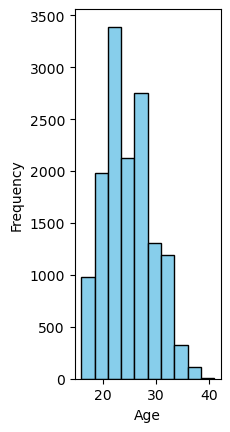

In [ ]:
#Explore distribution of Age
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

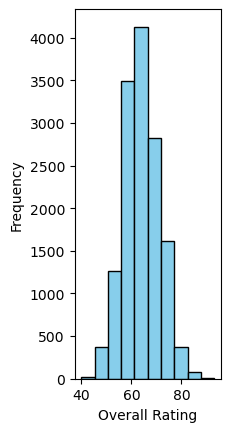

In [ ]:
# Explore distribution of Overall rating
plt.subplot(1, 3, 1)
plt.hist(df['overall'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

In [ ]:
#Perform EDA


# get first value in the player positions column for the sake of simplicity
df['position'] = df['player_positions'].str.split(',').str[0].str.strip()

#List all the unique positions and classify them into broad categories of Attack, midfield and defence
print(df['position'].unique())

#function to categorize the player positions
def categorize_positions(pos):
    #Use the below dictionary, with key as the broad category and list of values as the specific positions
    position_category = {'Attack': ['CF', 'ST', 'RW', 'LW'], 'Midfield': ['RM', 'LM', 'CM', 'CDM', 'CAM'], 'Defence': ['CB', 'RB', 'LB', 'LWB', 'RWB', 'GK']}
    for key,value in position_category.items():
        if pos in value:
            return key
    return None

#Classify the positions into broad categories, Attack, Defence and Midfield and put them in column pos_category
df['pos_category'] = df['position'].apply(lambda x: categorize_positions(x))

#keeping relevant columns for our analysis and filtering the rest
df = df.filter(items=['short_name', 'age', 'league_level', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physique', 'overall', 'position', 'pos_category'])
df.head()

['CF' 'LW' 'RM' 'ST' 'CM' 'LM' 'CDM' 'CB' 'CAM' 'RW' 'RB' 'LB' 'LWB' 'RWB']


,short_name,age,league_level,pace,shooting,passing,dribbling,defending,physique,overall,position,pos_category
0,L. Messi,27,1.0,93.0,89.0,86.0,96.0,27.0,63.0,93,CF,Attack
1,Cristiano Ronaldo,29,1.0,93.0,93.0,81.0,91.0,32.0,79.0,92,LW,Attack
2,A. Robben,30,1.0,93.0,86.0,83.0,92.0,32.0,64.0,90,RM,Midfield
3,Z. Ibrahimović,32,1.0,76.0,91.0,81.0,86.0,34.0,86.0,90,ST,Attack
5,Iniesta,30,1.0,75.0,72.0,89.0,91.0,59.0,63.0,89,CM,Midfield


## 4. Conclusion

# Answer the questions

### Question 1 : How do player attributes vary based on attacking vs mid vs defensive positions?

/var/folders/gs/h3rcmfyd7g10f470vvjqrh140000gn/T/ipykernel_92444/2040257725.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pos_df = df.groupby('pos_category')['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physique', 'overall'].mean().reset_index()


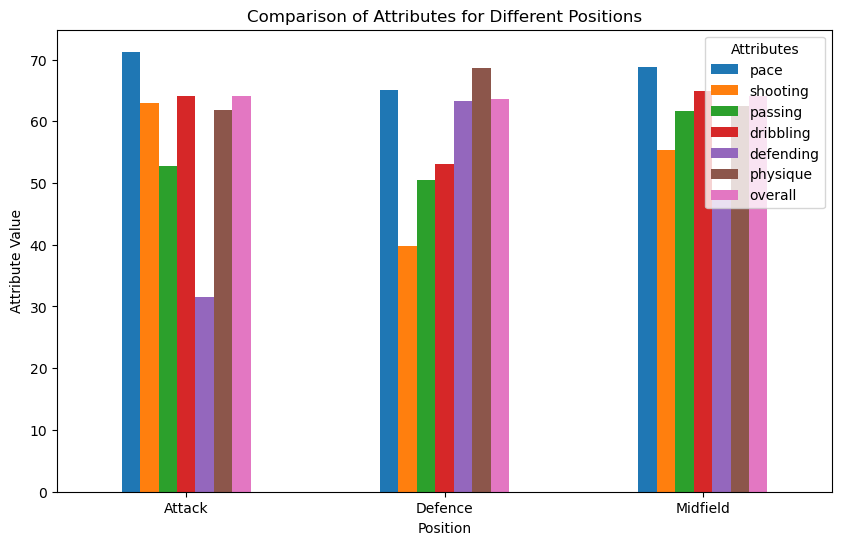

In [ ]:
#create a separate dataframe for plotting the comparison of attributes based on positions
pos_df = df.groupby('pos_category')['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physique', 'overall'].mean().reset_index()

pos_df.head()
# Set positions as the index for better plotting
pos_df.set_index('pos_category', inplace=True)

# Plotting the graph
pos_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Position')
plt.ylabel('Attribute Value')
plt.title('Comparison of Attributes for Different Positions')
plt.legend(title='Attributes')
plt.xticks(rotation=0)
plt.show()

### Question 2 : Are there any patterns in the performance of players based on their ages?

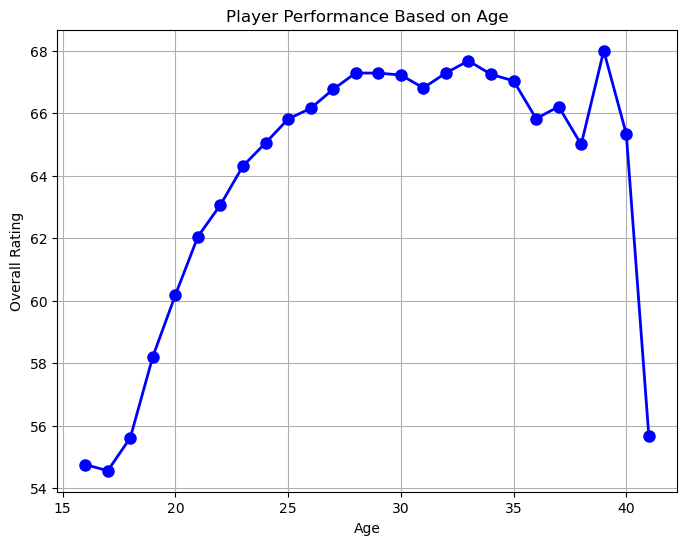

In [ ]:
age_rating = df.groupby('age')['overall'].mean().reset_index()

age_rating.head()
# df = pd.merge(df, age_rating, on='age', )

plt.figure(figsize=(8, 6))
plt.plot(age_rating['age'], age_rating['overall'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Player Performance Based on Age')
plt.grid(True)
plt.show()

## 5. Summary

### Question 1 : How do player attributes vary based on attacking vs mid vs defensive positions?
As seen in the graph, the following trend is observed:
1) Attacking positions have high rating for attributes pace, shooting and dribbling  
2) Midfield positions have high rating for attributes pace, passing, dribbilng
3) Defensive positions have high rating for attributes defending and physique
4) The overall rating is constant across all positions

### Question 2 : Are there any patterns in the performance of players based on their ages?
The following observations can be made for the given question:
1) The rating of players somewhat linearly for the age range 15-25
2) There is no significant difference in rating for the age group 25-35
3) For the group 35+, the rating starts dropping except for an outlier which is at the peak